<a href="https://colab.research.google.com/github/nbilasals/diabetes_pred_stacking/blob/main/kfold_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
# CONNECT GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("/content/drive/My Drive/dataset/project/diabetes_classification/diabetes.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [46]:
col_summary = pd.DataFrame(df.columns, columns = ['Column'])
na_list = []
unique_list = []
dtype_list = []

for col in df.columns:
    na_list.append(df[col].isna().sum())
    unique_list.append(df[col].nunique())
    dtype_list.append(df[col].dtype)
    
col_summary['Missing values'] = na_list
col_summary['Unique values'] = unique_list
col_summary['Data type'] = dtype_list
col_summary

Column  Missing values  Unique values Data type
0               Pregnancies               0             17     int64
1                   Glucose               0            136     int64
2             BloodPressure               0             47     int64
3             SkinThickness               0             51     int64
4                   Insulin               0            186     int64
5                       BMI               0            248   float64
6  DiabetesPedigreeFunction               0            517   float64
7                       Age               0             52     int64
8                   Outcome               0              2     int64

0    500
1    268
Name: Outcome, dtype: int64


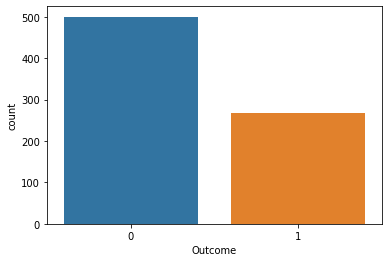

In [47]:
print(df['Outcome'].value_counts())
sns.countplot(x='Outcome',data=df)

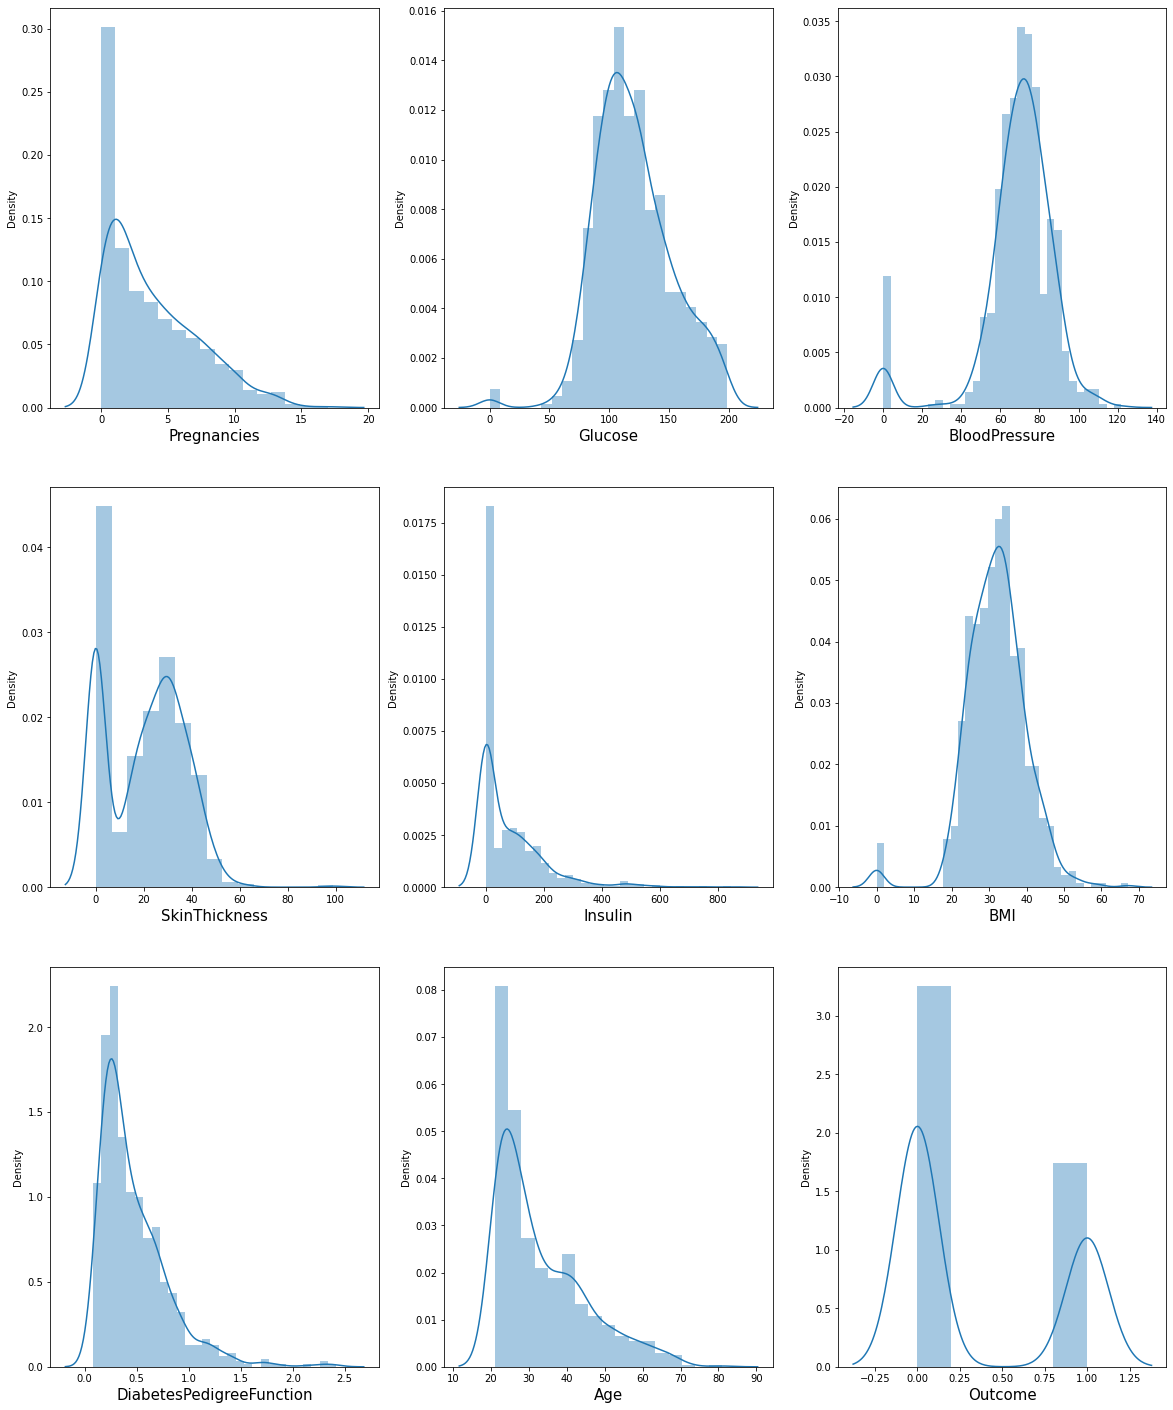

In [48]:
# let's see how data is distributed for every column.

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in df:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
plt.show()

In [49]:
# replacing zero values with the mean of the columnn

df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

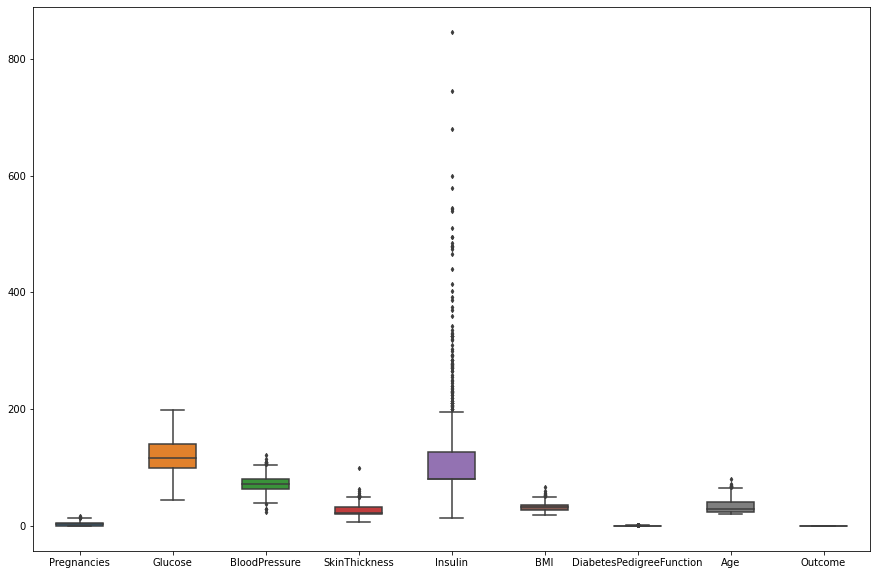

In [50]:
#Check The Outliers
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [51]:
outlier = df['Pregnancies'].quantile(0.98)
# removing the top 2% df from the pregnancies column
df = df[df['Pregnancies']<outlier]

outlier = df['BMI'].quantile(0.99)
# removing the top 1% df from BMI column
df = df[df['BMI']<outlier]

outlier = df['SkinThickness'].quantile(0.99)
# removing the top 1% df from SkinThickness column
df = df[df['SkinThickness']<outlier]

outlier = df['Insulin'].quantile(0.95)
# removing the top 5% df from Insulin column
df = df[df['Insulin']<outlier]

outlier = df['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% df from DiabetesPedigreeFunction column
df = df[df['DiabetesPedigreeFunction']<outlier]

outlier = df['Age'].quantile(0.99)
# removing the top 1% df from Age column
df = df[df['Age']<outlier]


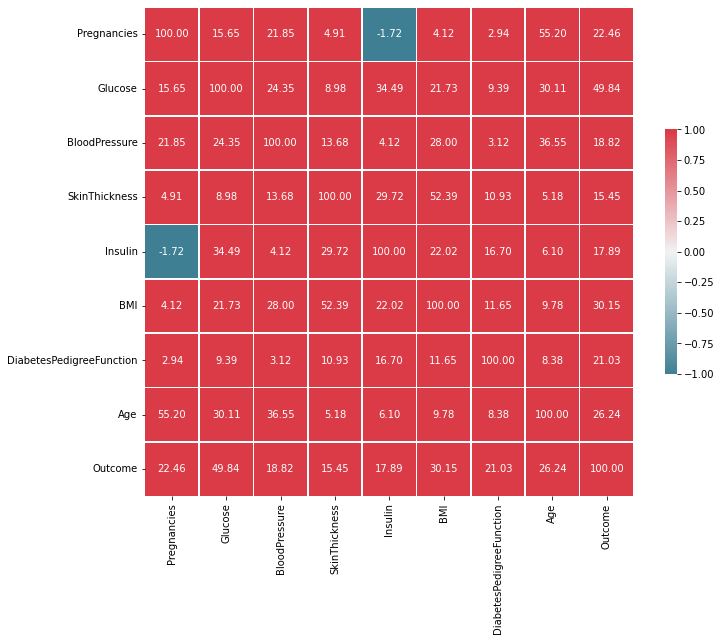

In [52]:
# Calculate the correlation matrix
corr = df.corr()

# Multiply the correlation matrix by 100 to express the values as percentages
corr_percent = corr * 100

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_percent, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")

plt.show()

In [53]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [54]:
# scaling the data 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
#MODEL SELECTION
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#cross validation

k = KFold(n_splits = 5)

In [57]:
#MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#logistic regression

lr_model = LogisticRegression()
lr_score = cross_val_score(lr_model , X_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
lr_score.mean()

-0.2338006230529595

In [58]:
rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model ,X_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.2522672204915196

In [59]:
svm_model = SVC()
svm_score = cross_val_score(svm_model , X_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
svm_score.mean()

-0.2505019037729318

In [60]:
dt_model = DecisionTreeClassifier()
dt_score = cross_val_score(dt_model , X_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.309865005192108

Text(0.5, 1.0, 'Neg Mean square error')

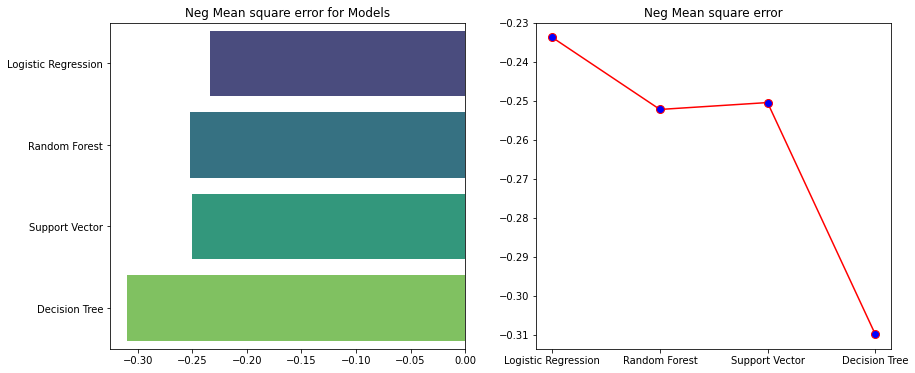

In [61]:
plt.figure(figsize = (14 , 6))
plt.subplot(1,2,1)
x = ['Logistic Regression','Random Forest' ,'Support Vector' ,'Decision Tree']
y = [lr_score.mean() , rf_score.mean() ,svm_score.mean() , dt_score.mean()]
plt.title('Neg Mean square error for Models')
sns.barplot(y,x,palette="viridis")

plt.subplot(1,2,2)
plt.plot(x ,y,marker = 'o' ,color = 'r',mfc ='b' ,ms =8 )
plt.title('Neg Mean square error')

In [62]:
#MODEL OPTIMAL PARAMETER SELECTION USING GRID SEARCH CV


model_params ={
    'RandomForestClassifier':
    {
        'model':RandomForestClassifier(),
        'param':
        {
         'n_estimators':[10 ,50 ,100,130],
         'criterion':['gini' ,'entropy'],
         'max_depth':range(4,8,1),
         'max_features':['auto' ,'log2']
        }
    },
    'SVC':
    {
        'model':SVC(),
        'param':
        {
            'C':[1,20],
            'gamma':[1,0.1],
            'kernel':['rbf']     
        }
    }
}

In [63]:
scores =[]
for model_name , mp in model_params.items():
    model_sel = GridSearchCV(estimator= mp['model'] ,param_grid= mp['param'] ,cv = 4 ,return_train_score=False)
    model_sel.fit(X_train,y_train)
    
    scores.append({
        'model':model_name,
        'best_score':model_sel.best_score_,
        'best_params':model_sel.best_params_
    })


In [64]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.7865671641791045,
  'best_params': {'criterion': 'gini',
   'max_depth': 5,
   'max_features': 'log2',
   'n_estimators': 10}},
 {'model': 'SVC',
  'best_score': 0.7587202874516308,
  'best_params': {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}}]

In [65]:
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

svm_model = SVC(C=1 ,gamma=0.1 ,kernel='rbf')
svm_model.fit(X_train ,y_train)
ytest_pred = svm_model.predict(X_test)
ytrain_pred = svm_model.predict(X_train)
accuracy_score(y_test ,ytest_pred)

0.8074074074074075

In [66]:
print("Classification Report : \n", classification_report(y_test, ytest_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.91      0.86        89
           1       0.78      0.61      0.68        46

    accuracy                           0.81       135
   macro avg       0.80      0.76      0.77       135
weighted avg       0.80      0.81      0.80       135

